# Data exploration

In [1]:
from sepsis import constants
from sepsis.io import get_train

import matplotlib.pyplot as plt

In [2]:
data = get_train()

In [7]:
# just to make sure IDs are different across the sources as we merged them in a single dataframe
data.groupby(['ID']).source.nunique().max()

1

In [3]:
data.head(10)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,ID,source
0,82.5,100.0,36.30,127.5,81.00,61.5,13.25,NaN,1.0,NaN,...,83.0,54.68,1,0.0,1.0,-17.4,8,0,11540,A
1,92.0,100.0,36.40,121.0,79.00,63.0,17.00,NaN,NaN,NaN,...,NaN,54.68,1,0.0,1.0,-17.4,9,0,11540,A
2,90.5,100.0,36.65,109.0,69.50,56.0,12.00,NaN,0.0,NaN,...,NaN,54.68,1,0.0,1.0,-17.4,10,0,11540,A
3,94.0,100.0,36.90,129.0,71.00,56.0,12.00,NaN,NaN,NaN,...,NaN,54.68,1,0.0,1.0,-17.4,11,0,11540,A
4,84.0,100.0,37.10,104.5,57.67,54.0,12.00,NaN,NaN,NaN,...,NaN,54.68,1,0.0,1.0,-17.4,12,0,11540,A
5,86.0,99.5,37.20,104.0,69.00,56.0,12.00,NaN,NaN,NaN,...,190.0,54.68,1,0.0,1.0,-17.4,13,0,11540,A
6,77.0,100.0,37.30,115.0,74.00,58.5,12.00,NaN,2.0,NaN,...,NaN,54.68,1,0.0,1.0,-17.4,14,0,11540,A
7,75.0,100.0,37.20,116.0,81.00,66.0,12.00,NaN,NaN,NaN,...,NaN,54.68,1,0.0,1.0,-17.4,15,0,11540,A
8,79.0,99.0,37.40,101.0,72.00,62.0,12.00,NaN,NaN,NaN,...,NaN,54.68,1,0.0,1.0,-17.4,16,0,11540,A
9,81.0,99.0,37.60,106.0,73.00,62.0,12.00,NaN,NaN,NaN,...,NaN,54.68,1,0.0,1.0,-17.4,17,0,11540,A


### Demography of patients

In [4]:
data.groupby('source')[['Age','Gender','HospAdmTime']].mean()

,Age,Gender,HospAdmTime
source,,,
A,63.035312,0.576094,-53.411921
B,60.938401,0.538172,-60.723628


<AxesSubplot:title={'center':'Age'}, ylabel='Frequency'>

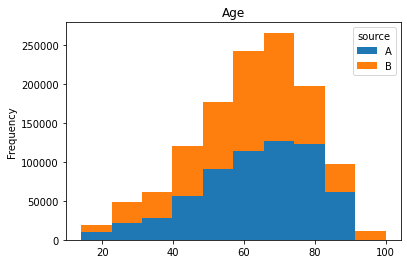

In [5]:
data.pivot(columns='source').Age.plot(kind = 'hist', stacked=True, title='Age')

### Features

In [6]:
data.describe()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,ID
count,1.118568e+06,1.080105e+06,419959.000000,1.060491e+06,1.086847e+06,852592.000000,1.050513e+06,45757.000000,67505.000000,52186.000000,...,8322.000000,73722.000000,1.241285e+06,1.241285e+06,755150.000000,755150.000000,1.241285e+06,1.241285e+06,1.241285e+06,1.241285e+06
mean,8.465354e+01,9.719947e+01,36.977550,1.236705e+02,8.239887e+01,63.898934,1.872552e+01,32.947123,-0.678436,24.094566,...,286.683706,196.650324,6.200589e+01,5.574771e-01,0.498859,0.501141,-5.700142e+01,2.680016e+01,1.798217e-02,5.922841e+04
std,1.734522e+01,2.941367e+00,0.769953,2.317558e+01,1.632554e+01,13.966323,5.098134e+00,8.028045,4.266515,4.339507,...,153.146958,104.057286,1.636417e+01,4.966856e-01,0.499999,0.499999,1.682324e+02,2.837751e+01,1.328865e-01,5.026754e+04
min,2.000000e+01,2.000000e+01,20.900000,2.000000e+01,2.000000e+01,20.000000,1.000000e+00,10.000000,-32.000000,0.000000,...,34.000000,2.000000,1.400000e+01,0.000000e+00,0.000000,0.000000,-5.366860e+03,1.000000e+00,0.000000e+00,1.000000e+00
25%,7.200000e+01,9.600000e+01,36.500000,1.070000e+02,7.100000e+01,54.000000,1.500000e+01,28.000000,-3.000000,22.000000,...,183.000000,127.000000,5.168000e+01,0.000000e+00,0.000000,0.000000,-4.770000e+01,1.100000e+01,0.000000e+00,9.978000e+03
50%,8.400000e+01,9.800000e+01,37.000000,1.210000e+02,8.000000e+01,62.000000,1.800000e+01,33.000000,0.000000,24.000000,...,248.000000,181.000000,6.400000e+01,1.000000e+00,0.000000,1.000000,-6.110000e+00,2.100000e+01,0.000000e+00,1.996200e+04
75%,9.600000e+01,9.950000e+01,37.500000,1.380000e+02,9.200000e+01,72.000000,2.150000e+01,38.000000,1.000000,27.000000,...,350.000000,245.000000,7.400000e+01,1.000000e+00,1.000000,1.000000,-4.000000e-02,3.400000e+01,0.000000e+00,1.099190e+05
max,2.800000e+02,1.000000e+02,50.000000,3.000000e+02,3.000000e+02,300.000000,1.000000e+02,100.000000,100.000000,55.000000,...,1760.000000,1783.000000,1.000000e+02,1.000000e+00,1.000000,1.000000,2.399000e+01,3.360000e+02,1.000000e+00,1.199990e+05


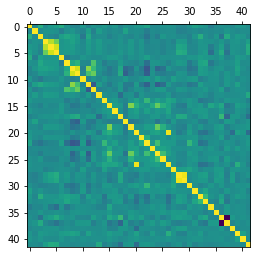

In [7]:
plt.matshow(data.corr())

### Missing data

In [8]:
missing = data.isna().mean()
missing.sort_values().head(20)

source         0.000000
SepsisLabel    0.000000
ICULOS         0.000000
HospAdmTime    0.000000
Gender         0.000000
Age            0.000000
ID             0.000000
HR             0.098863
MAP            0.124418
O2Sat          0.129849
SBP            0.145651
Resp           0.153689
DBP            0.313138
Unit2          0.391639
Unit1          0.391639
Temp           0.661674
Glucose        0.828687
Potassium      0.906707
Hct            0.911351
FiO2           0.917003
dtype: float64

In [9]:
# by source
data.isna().groupby(data['source']).mean()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,ID,source
source,,,,,,,,,,,,,,,,,,,,,
A,0.077475,0.119187,0.662694,0.151828,0.102056,0.480564,0.097851,1.000000,0.895412,0.919232,...,0.934962,0.0,0.0,0.484220,0.484220,0.0,0.0,0.0,0.0,0.0
B,0.121041,0.140906,0.660616,0.139245,0.147606,0.139521,0.211591,0.924912,0.997678,0.998116,...,0.946463,0.0,0.0,0.295634,0.295634,0.0,0.0,0.0,0.0,0.0


Vital sign variables (HR, O2Sat,Temp, SBP, MAP, DBP, Resp, EtCO2) are well recorded with the exception of etCO2 (> 92% missing) and to a lesser extent Temperature (33% missing)

Laboratory variables are too often missing and will be excluded from the analysis as a first approach (it would take too much time to explore the pattern of missig data more in depth)

### Duration

Text(0.5, 1.0, 'Histogram of data duration')

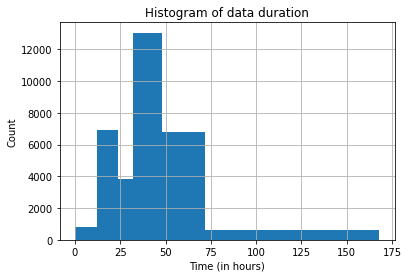

In [10]:
bins = [0,12,24,32,48,72,7*24]
data.groupby('ID').size().hist(bins=bins)
plt.xlabel('Time (in hours)')
plt.ylabel('Count')
plt.title('Histogram of data duration')

### Class unbalance

Highly unbalanced dataset

In [11]:
# by source
data.groupby(['ID','source'])['SepsisLabel'].max().groupby('source').mean()

source
A    0.088026
B    0.057125
Name: SepsisLabel, dtype: float64

In [12]:
# globally
data.groupby(['ID','source'])['SepsisLabel'].max().mean()

0.072703607288955

### A first glimpse into potential signals of sepsi 

Difference patient with septis vs  no septis

In [13]:
data.groupby('SepsisLabel').mean()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,ID
SepsisLabel,,,,,,,,,,,,,,,,,,,,,
0,84.538072,97.203378,36.971961,123.716123,82.441235,63.932918,18.692826,32.976666,-0.686857,24.107096,...,11.368163,285.535309,196.867806,62.005210,0.556849,0.497093,0.502907,-56.643896,26.284757,59417.100414
1,90.813624,96.993102,37.281366,121.163865,80.165575,62.085055,20.481435,32.410101,-0.437960,23.637320,...,13.338220,322.867188,187.312872,62.042782,0.591775,0.605411,0.394589,-76.526106,54.946373,48923.981497


Change in variable means before/after for each patient

In [ ]:
means = data.groupby(['ID','SepsisLabel'])[constants.VITALS].mean()
means.head(3)

,,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2
ID,SepsisLabel,,,,,,,,
1,0,101.571429,91.477273,36.778000,126.809524,87.261905,NaN,24.820000,NaN
2,0,60.954545,97.000000,36.165000,136.600000,66.704545,44.066667,14.236842,NaN
3,0,79.611111,95.431818,37.609375,140.033333,81.048000,54.392857,25.633333,NaN


In [ ]:
changes = means.sort_values('SepsisLabel').groupby('ID').pct_change().reset_index() # compute change pourcentage between consecutives group elements, i.e. non-sepsi part mean vs sepsi part mean
changes = changes[changes['SepsisLabel'] == 1]
changes.head()

,ID,SepsisLabel,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2
31931,1088,1,-0.050693,-0.008177,-0.014735,0.026406,0.043692,0.065181,0.101158,NaN
31932,118620,1,0.083830,0.029445,0.037965,-0.036935,-0.047586,-0.060511,-0.495007,NaN
31933,100100,1,0.081554,-0.017861,0.026757,0.053273,0.125909,0.133956,0.129483,NaN
31934,107847,1,-0.050136,0.015046,NaN,0.123148,0.147712,0.133655,-0.111111,NaN
31935,9441,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# check we didn't lose anyone in the battle
changes.shape[0] == data.groupby('ID')['SepsisLabel'].max().sum()

True

In [ ]:
changes.mean()

ID             49260.844416
SepsisLabel        1.000000
HR                 0.035429
O2Sat             -0.004334
Temp               0.007474
SBP                0.004647
MAP                0.000172
DBP               -0.003458
Resp               0.055159
EtCO2              0.013186
dtype: float64

array([[<AxesSubplot:title={'center':'Temp'}>,
        <AxesSubplot:title={'center':'HR'}>],
       [<AxesSubplot:title={'center':'Resp'}>, <AxesSubplot:>]],
      dtype=object)

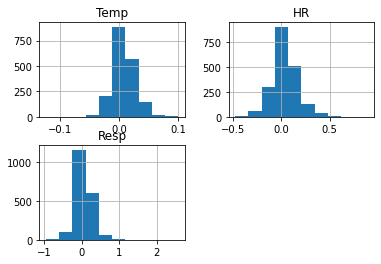

In [ ]:
changes[['Temp','HR', 'Resp']].hist()

Noticeable change, especially for HR and Resp

Change point based models might be promising

### Failed PCA attempt

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import numpy as np
pipe = Pipeline([('impute', SimpleImputer(missing_values=np.nan)), ('scaler', StandardScaler()), ('pca', PCA(n_components=2))])
feat = data.drop(['ID','source','SepsisLabel'], axis=1)
X = pipe.fit_transform(feat)

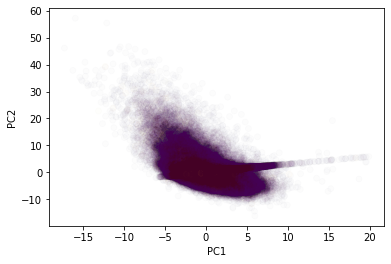

In [ ]:
plt.scatter(X[:,0], X[:,1], c = data['SepsisLabel'],)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()